<a href="https://colab.research.google.com/github/AhmedAboushanab/Machine-learning-models/blob/main/Random_forest_classification_model_with_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

## Importing the libraries

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 13.8 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
import shap
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Total_L2_Additional taxa - Copy2.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[7.468510e+00 2.411700e-01 7.925547e+01 1.257949e+01 4.553700e-01
  0.000000e+00]
 [2.099656e+01 4.211000e-02 4.841867e+01 1.807778e+01 2.227190e+00
  0.000000e+00]
 [1.891629e+01 8.493800e-01 4.263863e+01 2.553171e+01 9.880000e-02
  0.000000e+00]
 ...
 [3.235608e+01 2.117880e+00 5.620852e+01 7.463300e+00 0.000000e+00
  0.000000e+00]
 [9.025368e+01 3.532000e-02 9.554750e+00 1.562500e-01 0.000000e+00
  0.000000e+00]
 [1.901704e+01 4.430000e-02 5.706990e+01 2.025380e+01 1.519900e-01
  0.000000e+00]]


In [ ]:
print(y_train)

['Netherlands' 'Netherlands' 'Netherlands' ... 'Finland' 'USA'
 'Netherlands']


In [ ]:
print(X_test)

[[7.386330e+00 4.471600e-01 8.740749e+01 3.916570e+00 2.679000e-02
  0.000000e+00]
 [2.433670e+01 2.014510e+00 6.980561e+01 3.823690e+00 0.000000e+00
  0.000000e+00]
 [2.640101e+01 3.660200e-01 5.653421e+01 1.353437e+01 3.081580e+00
  0.000000e+00]
 ...
 [4.823584e+01 3.106090e+00 4.792939e+01 3.134700e-01 4.152100e-01
  0.000000e+00]
 [8.217653e+01 5.314380e+00 1.145343e+01 1.026810e+00 0.000000e+00
  0.000000e+00]
 [2.415488e+01 2.500600e-01 7.418839e+01 1.406660e+00 0.000000e+00
  0.000000e+00]]


In [ ]:
print(y_test)

['Denmark' 'Denmark' 'Netherlands' 'China' 'Netherlands' 'China'
 'Netherlands' 'Denmark' 'Netherlands' 'Netherlands' 'Netherlands'
 'Denmark' 'Madagascar' 'China' 'Madagascar' 'Netherlands' 'Netherlands'
 'Madagascar' 'Finland' 'Denmark' 'China' 'USA' 'China' 'Netherlands'
 'China' 'Madagascar' 'Netherlands' 'Netherlands' 'China' 'Denmark'
 'Canada' 'USA' 'Denmark' 'China' 'Sweden' 'Netherlands' 'Denmark'
 'Netherlands' 'Netherlands' 'Sweden' 'USA' 'China' 'USA' 'Netherlands'
 'Netherlands' 'China' 'Sweden' 'China' 'China' 'China' 'Netherlands'
 'Denmark' 'Netherlands' 'Denmark' 'China' 'Netherlands' 'Netherlands'
 'Denmark' 'USA' 'Madagascar' 'Sweden' 'China' 'Netherlands' 'USA'
 'Netherlands' 'China' 'Russia' 'Denmark' 'China' 'Madagascar' 'Denmark'
 'Netherlands' 'Netherlands' 'Madagascar' 'Italy' 'Denmark' 'Netherlands'
 'Netherlands' 'Denmark' 'USA' 'Sweden' 'China' 'USA' 'Italy' 'China'
 'Madagascar' 'Netherlands' 'China' 'Denmark' 'Netherlands' 'Sweden'
 'Netherlands' 'Madagasc

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Denmark' 'Denmark']
 ['China' 'Denmark']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'China']
 ['Denmark' 'Netherlands']
 ['Sweden' 'China']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'Denmark']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'Netherlands']
 ['Denmark' 'Denmark']
 ['Madagascar' 'Madagascar']
 ['Denmark' 'China']
 ['Madagascar' 'Madagascar']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'Netherlands']
 ['Madagascar' 'Madagascar']
 ['Netherlands' 'Finland']
 ['Denmark' 'Denmark']
 ['Madagascar' 'China']
 ['USA' 'USA']
 ['Denmark' 'China']
 ['Netherlands' 'Netherlands']
 ['China' 'China']
 ['Madagascar' 'Madagascar']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'China']
 ['Denmark' 'Denmark']
 ['China' 'Canada']
 ['China' 'USA']
 ['Denmark' 'Denmark']
 ['Madagascar' 'China']
 ['Sweden' 'Sweden']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'Denmark']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'Netherlands']
 ['De

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  7  0  0  0  0  0  0  0  0  1]
 [ 0 43  6  0  4  0  4  6  0  4  9]
 [ 0  6 26  0  1  0  1  9  0  0  1]
 [ 0  1  0  0  0  0  1  0  0  0  0]
 [ 0  3  0  0  4  0  0  2  0  0  1]
 [ 0  0  0  0  0  1  0  3  0  1  0]
 [ 0  4  3  0  0  0 24  1  0  0  0]
 [ 0  4  9  0  1  0  2 97  0  1  0]
 [ 0  2  0  0  1  0  0  1  0  0  1]
 [ 0 10  2  0  0  0  0  1  0  2  2]
 [ 0 10  4  0  3  0  0  4  0  0 29]]


0.6225895316804407

**Applying k-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

The least populated class in y has only 5 members, which is less than n_splits=10.


Accuracy: 61.98 %
Standard Deviation: 2.81 %


**Feature Importance Analysis**

In [ ]:
classifier.feature_importances_

array([0.23594675, 0.22206124, 0.16312876, 0.22203626, 0.12293449,
       0.0338925 ])

Text(0.5, 0, 'Random Forest Feature Importance')

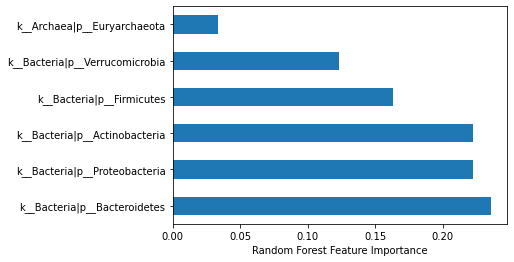

In [ ]:
#Feature importance using Feature importance attribute in Random forest classifier
feat_importances = pd.Series(classifier.feature_importances_, index=dataset.columns[0:6])
feat_importances.nlargest(7).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

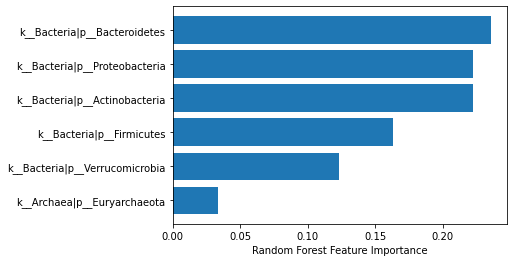

In [ ]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(dataset.columns[0:7][sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
permutation_importance(classifier, X_test, y_test)

{'importances': array([[ 0.06887052,  0.10192837,  0.12396694,  0.11570248,  0.07713499],
        [ 0.184573  ,  0.1707989 ,  0.15977961,  0.19559229,  0.17355372],
        [-0.01928375,  0.01101928, -0.00550964,  0.        ,  0.        ],
        [ 0.1707989 ,  0.18181818,  0.14325069,  0.17906336,  0.19008264],
        [ 0.06336088,  0.05509642,  0.07438017,  0.09641873,  0.04683196],
        [ 0.02754821,  0.03030303,  0.01101928,  0.03305785,  0.00826446]]),
 'importances_mean': array([ 0.09752066,  0.1768595 , -0.00275482,  0.17300275,  0.06721763,
         0.02203857]),
 'importances_std': array([0.02138139, 0.01224579, 0.00985595, 0.01610098, 0.01721267,
        0.0103076 ])}

Text(0.5, 0, 'Random Forest permutation importance')

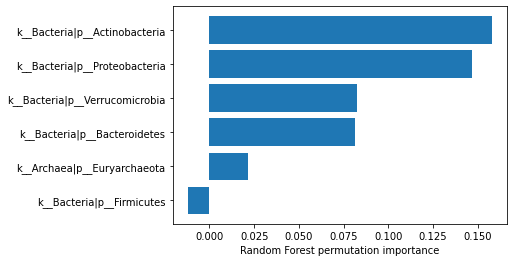

In [ ]:
#Feature importance using Permutation Feature importance
perm_importance = permutation_importance(classifier, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataset.columns[0:6][sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest permutation importance")

Text(0.5, 0, 'Random Forest permutation importance')

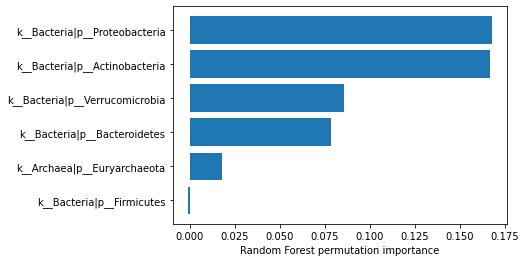

In [ ]:
perm_importance = permutation_importance(classifier, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataset.columns[0:6][sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest permutation importance")

In [ ]:
#Feature importance using SHAP values from SHAP library
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)

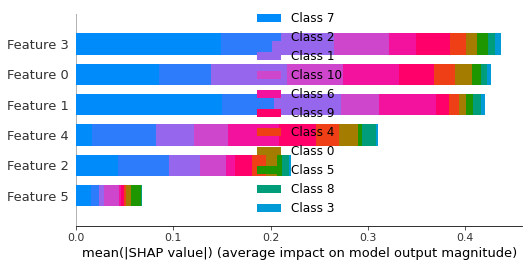

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

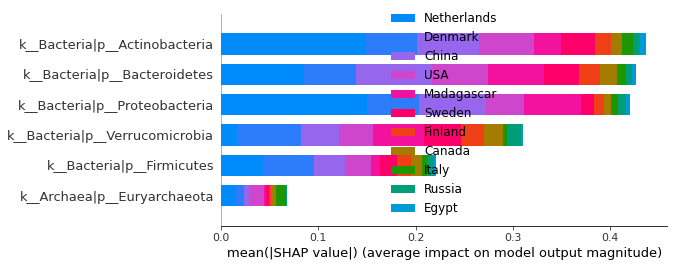

In [ ]:
#Class = ["Very High", "High", "Medium", "Low"]
#Class2 = ["Low", "High", "Medium", "Very High"]
shap.summary_plot(shap_values, X_test, feature_names= dataset.columns,
                  class_names = classifier.classes_)


In [ ]:
#grid search
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
y_pred = bestF.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Denmark' 'Denmark']
 ['Denmark' 'Denmark']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'China']
 ['Denmark' 'Netherlands']
 ['Netherlands' 'China']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'Denmark']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'Denmark']
 ['Madagascar' 'Madagascar']
 ['China' 'China']
 ['Madagascar' 'Madagascar']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'Netherlands']
 ['Madagascar' 'Madagascar']
 ['Netherlands' 'Finland']
 ['Denmark' 'Denmark']
 ['Madagascar' 'China']
 ['USA' 'USA']
 ['Netherlands' 'China']
 ['Netherlands' 'Netherlands']
 ['China' 'China']
 ['Madagascar' 'Madagascar']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'Netherlands']
 ['Netherlands' 'China']
 ['Denmark' 'Denmark']
 ['China' 'Canada']
 ['Denmark' 'USA']
 ['Denmark' 'Denmark']
 ['Madagascar' 'China']
 ['Sweden' 'Sweden']
 ['Netherlands' 'Netherlands']
 ['Denmark' 'Denmark']
 ['Netherlands' 'Netherlands']
 ['Netherlands' '

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0   7   0   0   0   0   0   0   0   0   1]
 [  0  54   4   0   0   0   4   8   0   2   4]
 [  0   7  27   0   0   0   1   8   0   0   1]
 [  0   1   1   0   0   0   0   0   0   0   0]
 [  0   6   0   0   0   0   0   2   0   0   2]
 [  0   0   0   0   0   0   0   4   0   1   0]
 [  0   6   4   0   0   0  20   1   0   0   1]
 [  0   3   3   0   0   0   1 106   0   1   0]
 [  0   2   0   0   0   0   0   1   0   0   2]
 [  0  12   1   0   0   0   0   2   0   1   1]
 [  0  11   4   0   0   0   0   4   0   0  31]]


0.6584022038567493

In [ ]:
classifier.feature_importances_

array([0.23594675, 0.22206124, 0.16312876, 0.22203626, 0.12293449,
       0.0338925 ])

Text(0.5, 0, 'Random Forest Feature Importance')

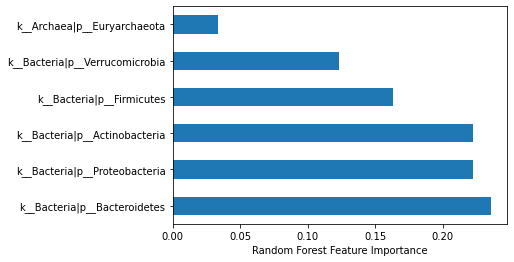

In [ ]:
#Feature importance using Feature importance attribute in Random forest classifier
feat_importances = pd.Series(classifier.feature_importances_, index=dataset.columns[0:6])
feat_importances.nlargest(7).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

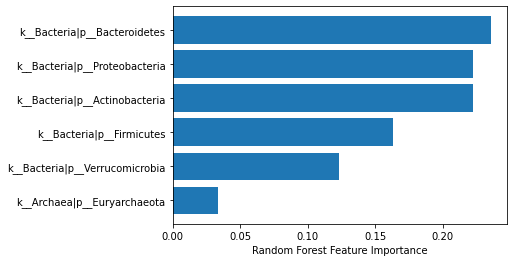

In [ ]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(dataset.columns[0:7][sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")